kerasを実行するためにtensorflowのバージョンをダウングレード
バージョン変更前にランタイムを再起動する必要がある。(ランタイム→ランタイムを再起動→[1]を実行)

In [0]:
# ライブラリの特定のバージョンへ変更する
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 72kB/s 
     |████████████████████████████████| 491kB 52.6MB/s 
     |████████████████████████████████| 3.2MB 52.5MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [0]:
#IMDbデータセットの読み込み(3-1)
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
#IMDbの訓練データを確認する
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [0]:
#IMDbのレビュー例を確認する

#word_indexは単語を整数のインデックスにマッピングする辞書
word_index = imdb.get_word_index()

#盛衰のインデックスを単語にマッピング
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

#レビューをデコード:インデックスのオフセットとして3が指定されているのは、
#0,1,2がそれぞれ「パディング」、「シーケンスの開始」、「不明」の
#インデックスとして予約されているためであることに注意
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#デコードしたレビューの内容を表示
decoded_review

1646592/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
#データの準備(3-2)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):

  #形状が(len(sequences), dimension)の行列を作成し、0で埋める
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    #results[i]のインデックスを1に設定
    results[i,sequence] = 1.
  return results

#訓練データのベクトル化
x_train = vectorize_sequences(train_data)
#テストデータのベクトル化
x_test = vectorize_sequences(test_data)

#ラベルのベクトル化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
#入力値を目的値に写像するネットワークモデルを定義(3-3)
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
#検証用データセットを設定(3-7)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
#損失関数とオプティマイザを定義
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.5098 - acc: 0.7912 - val_loss: 0.3818 - val_acc: 0.8662
Epoch 2/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.3030 - acc: 0.9023 - val_loss: 0.3176 - val_acc: 0.8742
Epoch 3/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.2265 - acc: 0.9274 - val_loss: 0.2869 - val_acc: 0.8855
Epoch 4/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.1799 - acc: 0.9424 - val_loss: 0.3039 - val_acc: 0.8769
Epoch 5/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.1471 - acc: 0.9545 - val_loss: 0.2875 - val_acc: 0.8876
Epoch 6/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.1245 - acc: 0.9612 - val_loss: 0.3040 - val_acc: 0.8831
Epoch 7/20
15000/15000 [=

In [0]:
#Historyオブジェクトのディクショナリの内容を確認する。
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


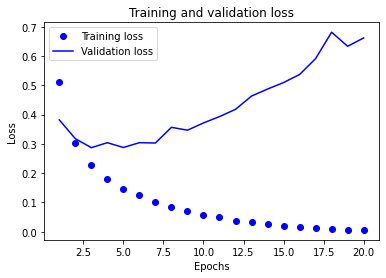

In [0]:
#訓練データと検証データでの損失値をプロットする(3-9)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#"bo"は"blue dot"(青のドット)を意味する
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#"b"は"solid blue line"(青の実線)を意味する
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

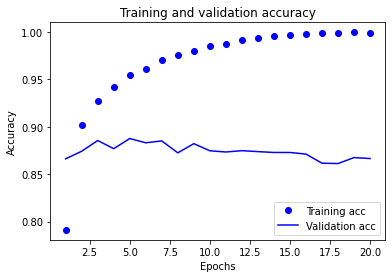

In [0]:
#訓練データと検証データでの正答率をプロット(3-10)
#図を消去
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

上の二つの図より途中からモデルは訓練データセットに対して最適化され、過学習であることが分かる。
そこで、新しいモデルを4エポックで学習し、テストデータで評価する。

In [0]:
#モデルの学習をやり直す(3-11)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu',))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

#モデルのテストデータに対する損失値と評価値を返す
#https://keras.io/ja/models/model/#evaluate
print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 95us/step - loss: 0.4470 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.2564 - acc: 0.9105
Epoch 3/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.1975 - acc: 0.9287
Epoch 4/4
25000/25000 [==============================] - 2s 76us/step
[0.30323381402015687, 0.88092]


In [0]:
#新しいデータで予測値を生成して、確認してみる
print(model.predict(x_test))
print(y_test)

[[0.14816684]
 [0.99996006]
 [0.867476  ]
 ...
 [0.11591315]
 [0.05121714]
 [0.54794586]]
[0. 1. 1. ... 0. 0. 0.]


#これ以降、追加実習
実習項目

1.   隠れ層1つにした場合に結果にどのような影響が与えられるのかを検証する
2.   隠れ層3つにした場合に結果にどのような影響が与えられるのかを検証する
3.   隠れユニットの数が多いまたは少ない層で試してみる(32ユニット)
4.   隠れユニットの数が多いまたは少ない層で試してみる(64ユニット)
5.   隠れユニットの数が多いまたは少ない層で試してみる(8ユニット)
6.   隠れユニットの数が多いまたは少ない層で試してみる(4ユニット)
7.   損失関数をbinary_crossentropyからmseに変更してみる
8.   活性化関数をreluからtanhに変更してみる

#1.隠れ層1つにした場合に結果にどのような影響が与えられるのかを検証する

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.5116 - acc: 0.7963 - val_loss: 0.4080 - val_acc: 0.8662
Epoch 2/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.3363 - acc: 0.8983 - val_loss: 0.3347 - val_acc: 0.8799
Epoch 3/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.2607 - acc: 0.9220 - val_loss: 0.2962 - val_acc: 0.8904
Epoch 4/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.2136 - acc: 0.9345 - val_loss: 0.2803 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1820 - acc: 0.9437 - val_loss: 0.2753 - val_acc: 0.8919
Epoch 6/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1562 - acc: 0.9542 - val_loss: 0.2726 - val_acc: 0.8918
Epoch 7/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1371 - acc: 0.9591 - val_loss: 0.2870 - 

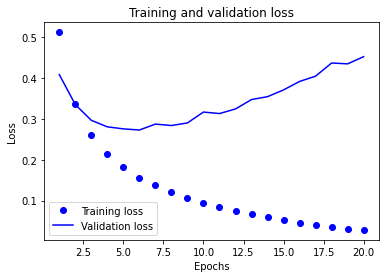

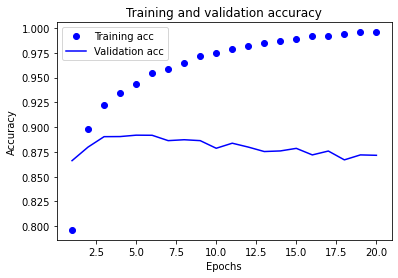

In [0]:
#1.隠れ層1つにした場合に結果にどのような影響が与えられるのかを検証する
#モデルを初期化
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

#モデルのテストデータに対する損失値と評価値を返す
#https://keras.io/ja/models/model/#evaluate
print(results)

#訓練データと検証データでの損失値をプロットする
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#"bo"は"blue dot"(青のドット)を意味する
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#"b"は"solid blue line"(青の実線)を意味する
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#訓練データと検証データでの正答率をプロット
#図を消去
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
#モデルを初期化
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

#モデルのテストデータに対する損失値と評価値を返す(エポック5回)
#https://keras.io/ja/models/model/#evaluate
print(results)

#エポックを1回追加
model.fit(x_train, y_train, epochs=1, batch_size=512)
results = model.evaluate(x_test, y_test)

#モデルのテストデータに対する損失値と評価値を返す(エポック6回)
#https://keras.io/ja/models/model/#evaluate
print(results)

Epoch 1/2
25000/25000 [==============================] - 3s 100us/step - loss: 0.4483 - acc: 0.8349
Epoch 2/2
25000/25000 [==============================] - 2s 78us/step
[0.29828721398353575, 0.88816]
Epoch 1/1
25000/25000 [==============================] - 2s 75us/step
[0.2876774273014069, 0.88412]


#実習項目1について
グラフからは分かりにくいが、エポックごとの検証データに対する損失率及び正答率に注目すると分かるように5,6回目以降の学習でテストデータに対する損失率及び正答率が悪化しており、5,6回目以降の学習は訓練データに対する最適化が進み過学習であると考えられる。よって学習回数はエポック回数は5,6回が適当であると考えられる。実際にエポック回数5回または6回の学習モデルのほうがテストデータに対してよい値を得られた。以上より隠れ層1つのモデルは隠れ層2つのモデルと比較して少し多くの学習回数を必要とする。

#2.隠れ層3つにした場合に結果にどのような影響が与えられるのかを検証する

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 163us/step - loss: 0.4538 - acc: 0.8207 - val_loss: 0.3323 - val_acc: 0.8774
Epoch 2/20
25000/25000 [==============================] - 4s 149us/step - loss: 0.2525 - acc: 0.9095 - val_loss: 0.3090 - val_acc: 0.8749
Epoch 3/20
25000/25000 [==============================] - 4s 149us/step - loss: 0.1958 - acc: 0.9288 - val_loss: 0.2891 - val_acc: 0.8858
Epoch 4/20
25000/25000 [==============================] - 4s 148us/step - loss: 0.1651 - acc: 0.9414 - val_loss: 0.3034 - val_acc: 0.8828
Epoch 5/20
25000/25000 [==============================] - 4s 147us/step - loss: 0.1423 - acc: 0.9493 - val_loss: 0.3489 - val_acc: 0.8701
Epoch 6/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.1232 - acc: 0.9574 - val_loss: 0.3561 - val_acc: 0.8738
Epoch 7/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.1125 - acc: 0.9608 - val_loss: 0.4185 - 

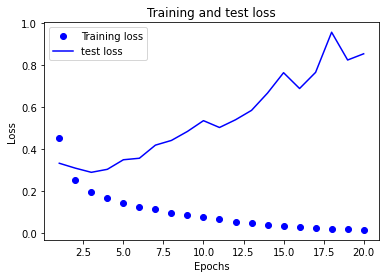

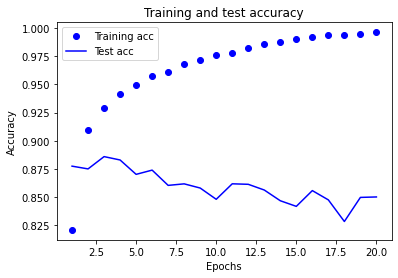

In [0]:
#2.隠れ層3つにした場合に結果にどのような影響が与えられるのかを検証する
#モデルを初期化
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

#モデルのテストデータに対する損失値と評価値を返す
#https://keras.io/ja/models/model/#evaluate
print(results)

#訓練データと検証データでの損失値をプロットする
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#"bo"は"blue dot"(青のドット)を意味する
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#"b"は"solid blue line"(青の実線)を意味する
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#訓練データと検証データでの正答率をプロット
#図を消去
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
#モデルを初期化
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

#モデルのテストデータに対する損失値と評価値を返す(エポック3回)
#https://keras.io/ja/models/model/#evaluate
print(results)

#エポックを1回追加
model.fit(x_train, y_train, epochs=1, batch_size=512)
results = model.evaluate(x_test, y_test)

#モデルのテストデータに対する損失値と評価値を返す(エポック4回)
#https://keras.io/ja/models/model/#evaluate
print(results)

Epoch 1/2
25000/25000 [==============================] - 3s 106us/step - loss: 0.4756 - acc: 0.8178
Epoch 2/2
25000/25000 [==============================] - 2s 80us/step
[0.28454220732688906, 0.88972]
Epoch 1/1
25000/25000 [==============================] - 2s 78us/step
[0.2842048065471649, 0.88688]


#実習項目2について
グラフからは分かりにくいが、エポックごとの検証データに対する損失率及び正答率に注目すると分かるように3,4回目以降の学習でテストデータに対する損失率及び正答率が悪化しており、3,4回目以降の学習は訓練データに対する最適化が進み過学習であると考えられる。よって学習回数はエポック回数は3,4回が適当であると考えられる。実際にエポック回数3回または4回の学習モデルのほうがテストデータに対してよい値を得られた。以上より隠れ層1つのモデルは隠れ層2つのモデルと比較して少し多くの学習回数を必要とする。また、隠れ層が1つや2つのモデルと比較すると、グラフから分かるように損失率及び正答率が学習ごと(各エポックごと)に振れ幅が大きいように見える。

#3.隠れユニットの数が多いまたは少ない層で試してみる(32ユニット)


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.5110 - acc: 0.7712 - val_loss: 0.3654 - val_acc: 0.8681
Epoch 2/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.2864 - acc: 0.9061 - val_loss: 0.3159 - val_acc: 0.8759
Epoch 3/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.2106 - acc: 0.9271 - val_loss: 0.2838 - val_acc: 0.8865
Epoch 4/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1617 - acc: 0.9457 - val_loss: 0.3174 - val_acc: 0.8729
Epoch 5/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.1283 - acc: 0.9589 - val_loss: 0.3028 - val_acc: 0.8860
Epoch 6/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1049 - acc: 0.9675 - val_loss: 0.3044 - val_acc: 0.8825
Epoch 7/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.0811 - acc: 0.9750 - val_loss: 0.3710 - 

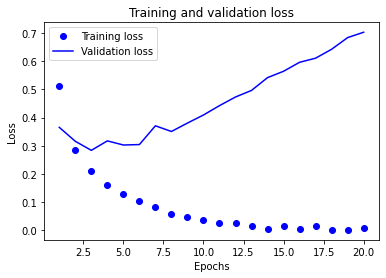

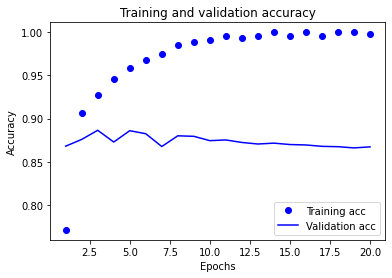

In [0]:
#3.隠れユニットの数が多いまたは少ない層で試してみる(32ユニット)
#モデルを初期化
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

#モデルのテストデータに対する損失値と評価値を返す
#https://keras.io/ja/models/model/#evaluate
print(results)

#訓練データと検証データでの損失値をプロットする
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#"bo"は"blue dot"(青のドット)を意味する
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#"b"は"solid blue line"(青の実線)を意味する
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#訓練データと検証データでの正答率をプロット
#図を消去
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#4.隠れユニットの数が多いまたは少ない層で試してみる(64ユニット)


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 229us/step - loss: 0.4916 - acc: 0.7641 - val_loss: 0.3255 - val_acc: 0.8790
Epoch 2/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.2614 - acc: 0.9052 - val_loss: 0.3276 - val_acc: 0.8657
Epoch 3/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.1864 - acc: 0.9319 - val_loss: 0.2755 - val_acc: 0.8899
Epoch 4/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.1497 - acc: 0.9448 - val_loss: 0.3255 - val_acc: 0.8747
Epoch 5/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.1032 - acc: 0.9635 - val_loss: 0.3181 - val_acc: 0.8832
Epoch 6/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.0759 - acc: 0.9760 - val_loss: 0.3509 - val_acc: 0.8825
Epoch 7/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.0639 - acc: 0.9792 - val_loss: 0.3897 - 

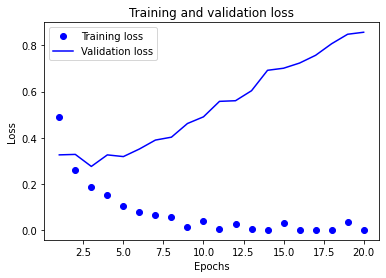

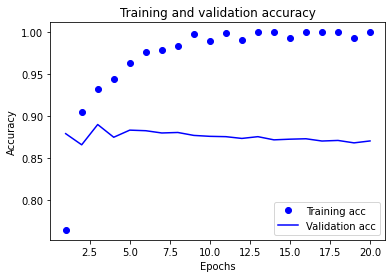

In [0]:
#4.隠れユニットの数が多いまたは少ない層で試してみる(64ユニット)
#モデルを初期化
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

#モデルのテストデータに対する損失値と評価値を返す
#https://keras.io/ja/models/model/#evaluate
print(results)

#訓練データと検証データでの損失値をプロットする
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#"bo"は"blue dot"(青のドット)を意味する
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#"b"は"solid blue line"(青の実線)を意味する
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#訓練データと検証データでの正答率をプロット
#図を消去
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#5.隠れユニットの数が多いまたは少ない層で試してみる(8ユニット)


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.5925 - acc: 0.7227 - val_loss: 0.5032 - val_acc: 0.8404
Epoch 2/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.4310 - acc: 0.8770 - val_loss: 0.3987 - val_acc: 0.8692
Epoch 3/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.3208 - acc: 0.9138 - val_loss: 0.3316 - val_acc: 0.8845
Epoch 4/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.2492 - acc: 0.9309 - val_loss: 0.3048 - val_acc: 0.8828
Epoch 5/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.2035 - acc: 0.9400 - val_loss: 0.2945 - val_acc: 0.8845
Epoch 6/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1700 - acc: 0.9523 - val_loss: 0.2902 - val_acc: 0.8840
Epoch 7/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1447 - acc: 0.9603 - val_loss: 0.2881 - 

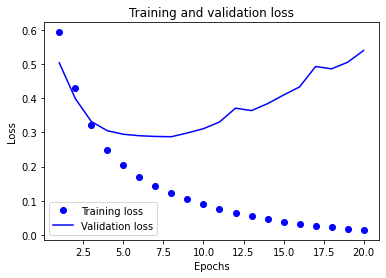

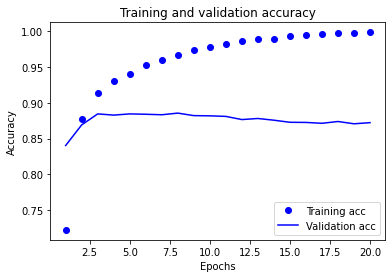

In [0]:
#5.隠れユニットの数が多いまたは少ない層で試してみる(8ユニット)
#モデルを初期化
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

#モデルのテストデータに対する損失値と評価値を返す
#https://keras.io/ja/models/model/#evaluate
print(results)

#訓練データと検証データでの損失値をプロットする
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#"bo"は"blue dot"(青のドット)を意味する
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#"b"は"solid blue line"(青の実線)を意味する
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#訓練データと検証データでの正答率をプロット
#図を消去
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#6.隠れユニットの数が多いまたは少ない層で試してみる(4ユニット)


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.6528 - acc: 0.7755 - val_loss: 0.6107 - val_acc: 0.8211
Epoch 2/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.5618 - acc: 0.8633 - val_loss: 0.5294 - val_acc: 0.8521
Epoch 3/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.4764 - acc: 0.8785 - val_loss: 0.4583 - val_acc: 0.8631
Epoch 4/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.4020 - acc: 0.8921 - val_loss: 0.4004 - val_acc: 0.8713
Epoch 5/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.3428 - acc: 0.9024 - val_loss: 0.3577 - val_acc: 0.8781
Epoch 6/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.2960 - acc: 0.9143 - val_loss: 0.3263 - val_acc: 0.8832
Epoch 7/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.2584 - acc: 0.9215 - val_loss: 0.3036 - 

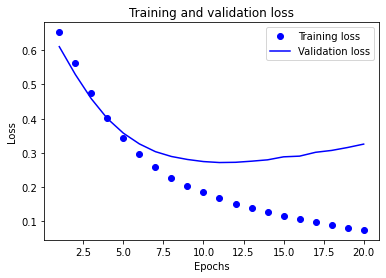

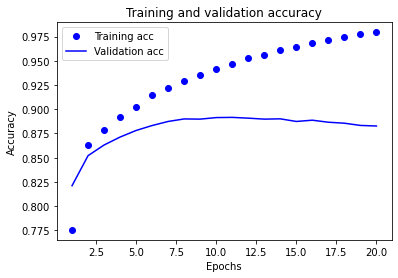

In [0]:
#6.隠れユニットの数が多いまたは少ない層で試してみる(4ユニット)
#モデルを初期化
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

#モデルのテストデータに対する損失値と評価値を返す
#https://keras.io/ja/models/model/#evaluate
print(results)

#訓練データと検証データでの損失値をプロットする
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#"bo"は"blue dot"(青のドット)を意味する
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#"b"は"solid blue line"(青の実線)を意味する
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#訓練データと検証データでの正答率をプロット
#図を消去
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#7.損失関数をbinary_crossentropyからmseに変更してみる

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.1638 - acc: 0.7905 - val_loss: 0.1144 - val_acc: 0.8746
Epoch 2/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.0876 - acc: 0.9080 - val_loss: 0.0928 - val_acc: 0.8873
Epoch 3/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.0627 - acc: 0.9315 - val_loss: 0.0863 - val_acc: 0.8863
Epoch 4/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.0491 - acc: 0.9463 - val_loss: 0.0829 - val_acc: 0.8877
Epoch 5/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.0382 - acc: 0.9614 - val_loss: 0.0844 - val_acc: 0.8843
Epoch 6/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.0309 - acc: 0.9701 - val_loss: 0.0893 - val_acc: 0.8778
Epoch 7/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.0256 - acc: 0.9759 - val_loss: 0.0912 - 

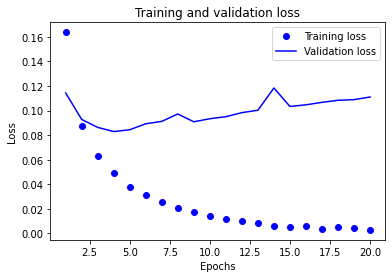

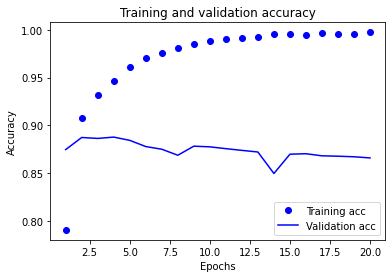

In [0]:
#7.損失関数をbinary_crossentropyからmseに変更してみる
#モデルを初期化
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

#モデルのテストデータに対する損失値と評価値を返す
#https://keras.io/ja/models/model/#evaluate
print(results)

#訓練データと検証データでの損失値をプロットする
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#"bo"は"blue dot"(青のドット)を意味する
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#"b"は"solid blue line"(青の実線)を意味する
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#訓練データと検証データでの正答率をプロット
#図を消去
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#8.活性化関数をreluからtanhに変更してみる

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 200us/step - loss: 0.4920 - acc: 0.8085 - val_loss: 0.3708 - val_acc: 0.8630
Epoch 2/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.2777 - acc: 0.9057 - val_loss: 0.2877 - val_acc: 0.8883
Epoch 3/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1947 - acc: 0.9344 - val_loss: 0.2682 - val_acc: 0.8889
Epoch 4/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1464 - acc: 0.9499 - val_loss: 0.2783 - val_acc: 0.8873
Epoch 5/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.1128 - acc: 0.9613 - val_loss: 0.3190 - val_acc: 0.8769
Epoch 6/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.0865 - acc: 0.9723 - val_loss: 0.3412 - val_acc: 0.8778
Epoch 7/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.0705 - acc: 0.9777 - val_loss: 0.3701 - 

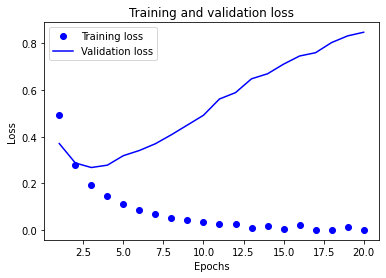

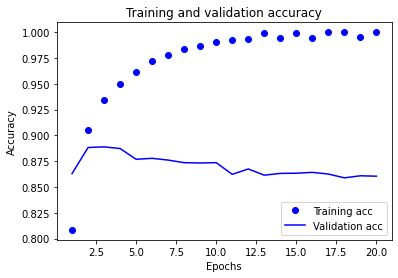

In [0]:
#8.活性化関数をreluからtanhに変更してみる
#モデルを初期化
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

#モデルのテストデータに対する損失値と評価値を返す
#https://keras.io/ja/models/model/#evaluate
print(results)

#訓練データと検証データでの損失値をプロットする
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#"bo"は"blue dot"(青のドット)を意味する
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#"b"は"solid blue line"(青の実線)を意味する
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#訓練データと検証データでの正答率をプロット
#図を消去
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()